# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as functional
from torch.autograd import Variable

In [4]:
class Net(torch.nn.Module):
    def __init__(self, inpurtCount, hiddenCount, outputCount):
        super(Net, self).__init__()
        self.hiddenLayer = torch.nn.Linear(inpurtCount, hiddenCount)
        self.outputLayer = torch.nn.Linear(hiddenCount, outputCount)
        
        
    def forward(self, x, activationFunc1, activationFunc2):
        return activationFunc2(self.outputLayer(activationFunc1(self.hiddenLayer(x))))
    


In [18]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy

1797
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


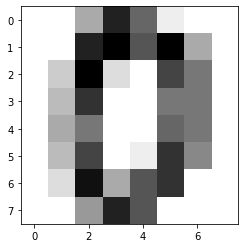

In [6]:
# Loading the data 
digits = datasets.load_digits()
print(len(digits.data))
print(digits.data[0])
plt.imshow(digits.data[0].reshape([8,8]),cmap=plt.cm.gray_r)

In [32]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

def toVariable(x, type):
    return Variable(torch.from_numpy(x).type(type))

def toVariableY(y):
    yTemp = []
    for v in y:
        temp = numpy.zeros(10, numpy.long)
        temp[v] = 1
        yTemp.append(temp)
    return Variable(torch.tensor(yTemp).type(torch.long))

X_train, X_test = toVariable(X_train, torch.float), toVariable(X_test, torch.float)
# y_train, y_test = toVariableY(y_train), toVariableY(y_test)
y_train, y_test = toVariable(y_train, torch.long), toVariable(y_test, torch.long)
print(y_test)

1347
450
1347
450
tensor([8, 6, 8, 8, 7, 0, 5, 5, 4, 2, 5, 5, 5, 4, 3, 8, 0, 3, 7, 2, 4, 9, 9, 1,
        9, 8, 8, 8, 6, 7, 6, 5, 2, 7, 3, 7, 7, 9, 8, 9, 2, 7, 9, 5, 4, 8, 4, 0,
        8, 3, 0, 9, 8, 8, 7, 5, 1, 1, 1, 6, 1, 2, 4, 7, 2, 4, 4, 1, 3, 0, 9, 7,
        7, 3, 4, 4, 4, 2, 0, 9, 9, 1, 1, 4, 9, 1, 2, 0, 8, 2, 6, 9, 5, 1, 3, 1,
        8, 6, 5, 0, 7, 3, 7, 0, 9, 9, 7, 7, 8, 6, 2, 5, 6, 1, 9, 9, 6, 8, 1, 4,
        9, 5, 9, 1, 3, 0, 9, 5, 5, 6, 3, 3, 3, 5, 5, 5, 9, 7, 7, 8, 0, 0, 1, 8,
        2, 4, 4, 3, 1, 3, 2, 0, 4, 1, 5, 8, 7, 7, 0, 7, 8, 7, 3, 2, 3, 4, 1, 5,
        2, 2, 9, 8, 2, 1, 7, 5, 4, 8, 6, 6, 1, 9, 4, 8, 8, 2, 7, 0, 2, 2, 9, 7,
        7, 6, 3, 1, 9, 6, 6, 5, 4, 1, 6, 7, 7, 4, 2, 8, 2, 0, 5, 4, 4, 5, 9, 1,
        8, 2, 6, 7, 5, 0, 7, 7, 1, 0, 3, 9, 3, 8, 9, 3, 5, 4, 8, 1, 7, 6, 0, 7,
        7, 0, 0, 7, 9, 3, 3, 9, 6, 0, 8, 8, 9, 2, 5, 3, 1, 5, 0, 7, 5, 4, 5, 4,
        5, 8, 8, 2, 9, 0, 0, 4, 5, 2, 9, 6, 6, 7, 7, 4, 4, 5, 9, 5, 1, 2, 8, 4,
        9, 2, 9, 3, 4,

In [82]:
net  = Net(64, 64, 10)

optimizer = torch.optim.Adam(net.parameters(), 0.001)
lossObj = torch.nn.CrossEntropyLoss()

losses = []

for i in range(500):
    predictData = net.forward(X_train, functional.relu, functional.softmax)
        
    loss = lossObj(predictData, y_train)
    if i % 10 == 0:
        print(loss.data.numpy())
    losses.append(loss.data.numpy())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
predictData = predictData.data.numpy()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


2.3108091
2.1565156
1.9484537
1.7684091
1.6655005
1.6273388
1.6043718
1.5563722
1.5356281
1.5220524
1.5132582
1.5068418
1.5018146
1.4978225
1.4945536
1.491725
1.4892116
1.4869578
1.4849551
1.483179
1.4815646
1.480039
1.4785415
1.4772501
1.4761888
1.4750158
1.4741488
1.4735136
1.4729751
1.472516
1.4721109
1.4717432
1.4713916
1.4710307
1.4706633
1.470345
1.4700631
1.4697775
1.4694316
1.4689902
1.4686565
1.4683847
1.4681251
1.467842
1.4674622
1.4671595
1.4669704
1.4668266
1.466702
1.4665941


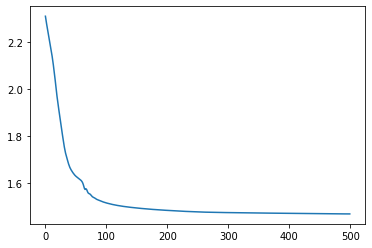

In [83]:
plt.plot(numpy.arange(len(losses)), losses)

In [86]:
def see_result():
    Y_prediction = net.forward(X_train, functional.relu, functional.softmax).data.numpy()
    Y_Result = []
    for i in range(Y_prediction.shape[0]):
        Y_Result.append( numpy.argmax(Y_prediction[i]) )
    Y_Result = numpy.array(Y_Result)
    counter = Counter(list((Y_Result == y_train.data.numpy()).reshape(-1)))
    print(counter)
    traing_accuracy = counter[True]/len(y_train)
    
    Y_prediction = net.forward(X_test, functional.relu, functional.softmax).data.numpy()
    Y_Result = []
    for i in range(Y_prediction.shape[0]):
        Y_Result.append( numpy.argmax(Y_prediction[i]) )
    Y_Result = numpy.array(Y_Result)
    counter = Counter(list((Y_Result == y_test.data.numpy()).reshape(-1)))
    print(counter)
    test_accuracy = counter[True]/len(y_test)
    
    print("\ntraing_accuracy:", traing_accuracy,"\ntest_accuracy:",  test_accuracy)
    
see_result()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


Counter({True: 1342, False: 5})
Counter({True: 436, False: 14})

traing_accuracy: 0.9962880475129918 
test_accuracy: 0.9688888888888889


# Congratulations ! You have completed assigment 4. 
